In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#由於存在梯度消失的問題，在實務中，SimpleRNN無法完整保留時間點以前的所有資訊
#LSTM(Long Short-Term Memory)長期短期記憶
#增加了一種跨多個時間點承載資訊的方法，允許之後重新注入過去的資訊，從而解決梯度消失的問題

In [3]:
from tensorflow import keras
from tensorflow.keras import models, layers

In [4]:
#準備IMDB資料
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000 #考慮做為特徵的文字數量
maxlen = 500 #只看評論的前500個文字

batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print('train_sequences:', len(input_train))
print('test_sequences:', len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=maxlen) #只看每篇評論前500個字，多的去除，不足填補0
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
train_sequences: 25000
test_sequences: 25000
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
#使用LSTM層
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

2022-08-24 16:00:02.843744: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [7]:
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

2022-08-24 16:00:03.353077: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
157/157 [==============================] - 83s 512ms/step - loss: 0.5408 - acc: 0.7447 - val_loss: 0.4308 - val_acc: 0.7972
Epoch 2/10
157/157 [==============================] - 80s 507ms/step - loss: 0.3085 - acc: 0.8775 - val_loss: 0.2967 - val_acc: 0.8780
Epoch 3/10
157/157 [==============================] - 79s 504ms/step - loss: 0.2390 - acc: 0.9111 - val_loss: 0.3221 - val_acc: 0.8610
Epoch 4/10
157/157 [==============================] - 80s 507ms/step - loss: 0.2045 - acc: 0.9233 - val_loss: 0.2842 - val_acc: 0.8856
Epoch 5/10
157/157 [==============================] - 79s 504ms/step - loss: 0.1793 - acc: 0.9349 - val_loss: 0.2872 - val_acc: 0.8852
Epoch 6/10
157/157 [==============================] - 79s 504ms/step - loss: 0.1590 - acc: 0.9431 - val_loss: 0.3314 - val_acc: 0.8730
Epoch 7/10
157/157 [==============================] - 79s 502ms/step - loss: 0.1436 - acc: 0.9494 - val_loss: 0.3950 - val_acc: 0.8838
Epoch 8/10
157/157 [==============================] - 7

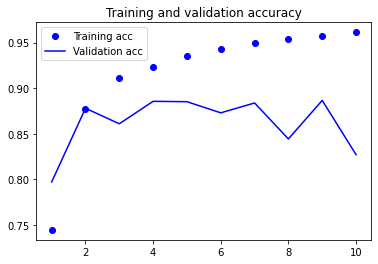

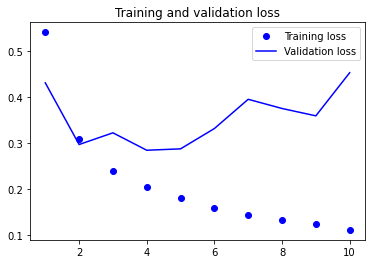

In [8]:
#繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()